---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company. 
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient.

In [2]:
import networkx as nx

# This line must be commented out when submitting to the autograder
!head ./data/email_network.txt

#Sender	Recipient	time
1	2	1262454010
1	3	1262454010
1	4	1262454010
1	5	1262454010
1	6	1262454010
1	7	1262454010
1	8	1262454010
1	9	1262454010
1	10	1262454010


In [13]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
#     print(edges)
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edgelist=edges);

### Question 1

Using networkx, load up the directed multigraph from `email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

In [3]:
def answer_one():
    # Your Code Here
    return nx.read_edgelist(path='./data/email_network.txt', data=[('time', int)], create_using=nx.MultiDiGraph()) # Your Answer Here
answer_one()

<IPython.core.display.Javascript object>


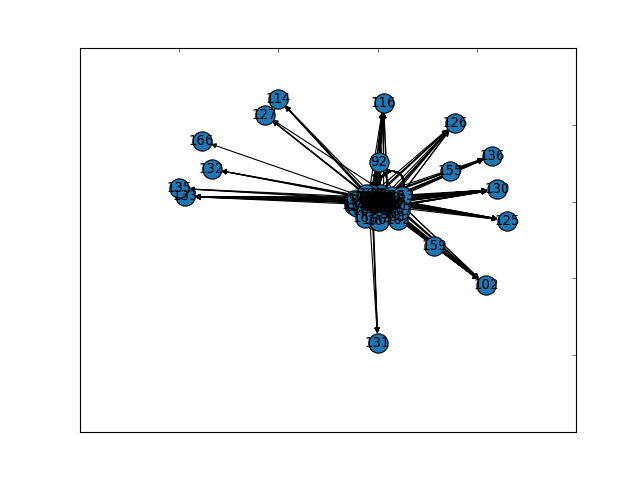

In [14]:
plot_graph(answer_one())

### Question 2

How many employees and emails are represented in the graph from Question 1?

*This function should return a tuple (#employees, #emails).*

In [15]:
def answer_two():
        
    # Your Code Here
    numEmails = len(answer_one().edges())
    numEmployees = len(answer_one().nodes())
    return numEmployees, numEmails # Your Answer Here
answer_two()

(167, 82927)

### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the receiver, but not vice versa. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [16]:
def answer_three():
        
    # Your Code Here
    # Part 1
    strong = nx.is_strongly_connected(answer_one())
    # Part 2
    weak = nx.is_weakly_connected(answer_one())
    return strong, weak # Your Answer Here
answer_three()

(False, True)

### Question 4

How many nodes are in the largest (in terms of nodes) weakly connected component?

*This function should return an int.*

In [17]:
# max(nx.weakly_connected_components(answer_one()), key=len)

In [18]:
def answer_four():
        
    # Your Code Here
    maxNumWeak = max(nx.weakly_connected_components(answer_one()), key=len)
    return len(maxNumWeak) # Your Answer Here
answer_four()

167

### Question 5

How many nodes are in the largest (in terms of nodes) strongly connected component?

*This function should return an int*

In [19]:
def answer_five():
        
    # Your Code Here
    maxNumStrong = max(nx.strongly_connected_components(answer_one()), key=len)
    return len(maxNumStrong) # Your Answer Here
answer_five()

126

### Question 6

Using the NetworkX function strongly_connected_component_subgraphs, find the subgraph of nodes in a largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [20]:
def answer_six():
        
    # Your Code Here
    g = max(nx.strongly_connected_components(answer_one()), key=len)
    G_sc = answer_one().subgraph(g)
    return G_sc # Your Answer Here
answer_six()

<IPython.core.display.Javascript object>


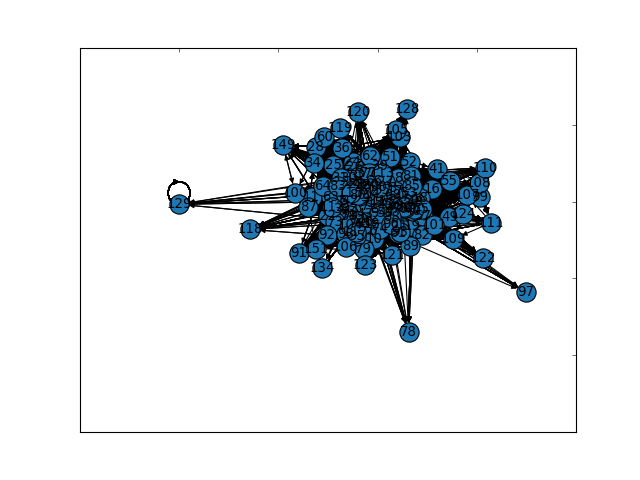

In [21]:
plot_graph(answer_six())

### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [22]:
G_sc = answer_six()
def answer_seven():
        
    # Your Code Here
    
    return nx.average_shortest_path_length(answer_six()) # Your Answer Here
answer_seven()

1.6461587301587302

### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [23]:
def answer_eight():
        
    # Your Code Here
#     ecc = nx.eccentricity(G_sc)
#     int(max(ecc))
    return nx.diameter(G_sc) # Your Answer Here
answer_eight()

3

### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [24]:
def answer_nine():
       
    # Your Code Here
#     d = nx.diameter(G_sc)
#     e = nx.eccentricity(G_sc)
#     n = [node for node in e.items() if node[1] == d]
#     set([node[0] for node in n])
    return set(nx.periphery(G_sc)) # Your Answer Here
answer_nine()

{'129', '134', '97'}

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [25]:
def answer_ten():
        
    # Your Code Here
#     r = nx.radius(G_sc)
#     e = nx.eccentricity(G_sc)
#     n = [node for node in e.items() if node[1] == r]
#     set([node[0] for node in n])
    return set(nx.center(G_sc)) # Your Answer Here
answer_ten()

{'38'}

### Question 11

Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc?

How many nodes are connected to this node?


*This function should return a tuple (name of node, number of satisfied connected nodes).*

In [26]:
def answer_eleven():
        
    # Your Code Here
    # We need to use only the nodes in the periphery
    # The eccentricity is the maximum distance from one node to all other nodes in G (returns an dict)
    # ecc = nx.eccentricity(G_sc)
    # The periphery is the set of nodes with eccentricity equal to the diameter.
    peri = nx.periphery(G_sc)
    # The diameter is the maximum eccentricity
    diam = nx.diameter(G_sc)

    numPathsDiam = {}

    # AQUI FICOU FODA!
    for node in peri:
        sp = nx.shortest_path(G=G_sc, source=node)
        pathsLenghtDiam = [path for path in sp.values() if (len(path) -1 == diam)]
        numPathsDiam[node] = len(pathsLenghtDiam)
    # FIM AQUI FICOU FODA!
    
    keys = list(numPathsDiam.keys())
    values = list(numPathsDiam.values())
    resultKey = keys[values.index(max(values))]
    
    return resultKey, numPathsDiam[resultKey] # == ('97', 63) # Your Answer Here
answer_eleven()

('97', 63)

### Question 12

Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc, what is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)? 

*This function should return an integer.*

In [27]:
def answer_twelve():
        
    # Your Code Here
    n = answer_eleven()[0]
    c = nx.center(G_sc)[0]
#     cut = nx.minimum_node_cut(G=G_sc, s=c, t=n)
    conn = nx.node_connectivity(G_sc, s=c, t=n) - 1
    return conn # Your Answer Here
answer_twelve()

5

### Question 13

Construct an undirected graph G_un using G_sc (you can ignore the attributes).

*This function should return a networkx Graph.*

In [18]:
def answer_thirteen():
    un = G_sc.to_undirected()
    return nx.Graph(un) # Your Answer Here
answer_thirteen()

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*

In [19]:
def answer_fourteen():
    g = answer_thirteen()
    return nx.transitivity(g), nx.average_clustering(g) # Your Answer Here
answer_fourteen()

(0.570111160700385, 0.6975272437231418)